# JSON. Что это?

## json

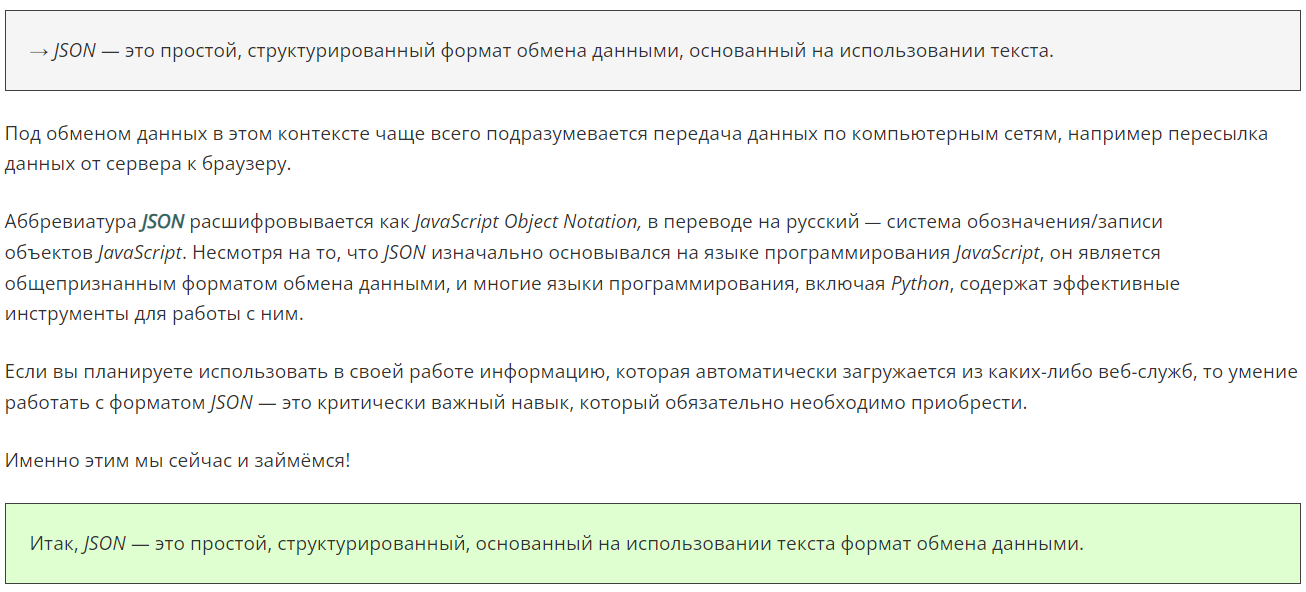

Для работы с данными в формате JSON используется модуль json из стандартной библиотеки языка Python, который необходимо будет загрузить перед началом работы с данными, выполнив следующую команду:

In [1]:
# Импортируем модуль json
import json

Также нам может быть полезен модуль ``pprint`` (от англ. pretty print, рус. красивый вывод на экран), а точнее — встроенная в него одноимённая функция ``pprint()``, с помощью которой можно красиво выводить на экран содержимое JSON-файла. Для загрузки нужной нам функции перед началом работы выполним следующий код:

In [2]:
# Импортируем функцию pprint()
from pprint import pprint

## КАК ВЫГЛЯДИТ JSON-ФАЙЛ?

Информация в формате JSON представляет собой (в закодированном виде) одну из двух структур:

* набор пар "ключ-значение", где ключ — это всегда строковая величина (в Python такая структура преобразуется в словарь);
* упорядоченный набор значений (при чтении JSON-файла в Python эта структура будет преобразована в список).


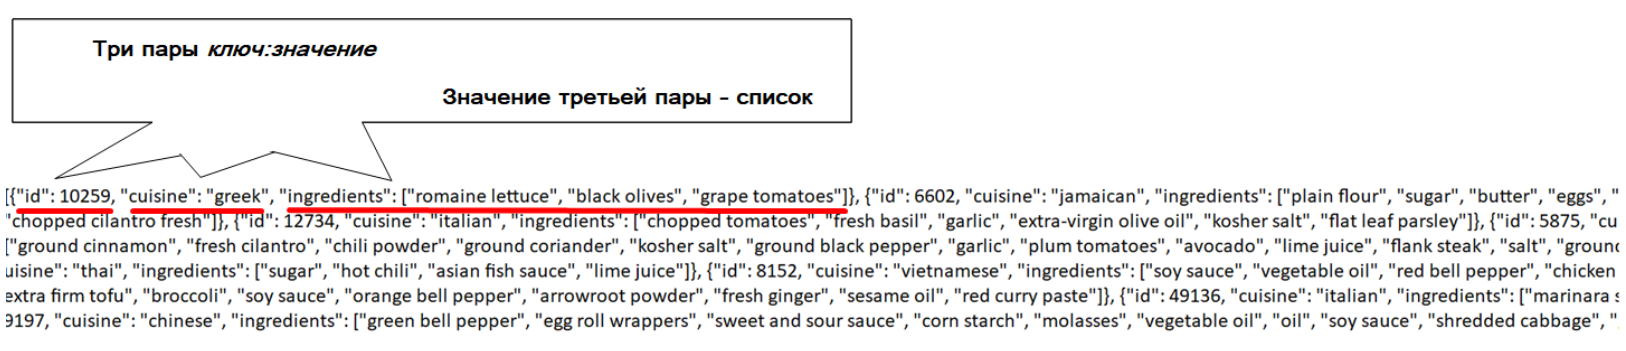

Формат JSON допускает неограниченное количество вложений этих структур друг в друга.

Давайте на примере посмотрим, что это означает. Все упражнения раздела мы будем выполнять на примере файла, содержащего информацию об ингредиентах блюд, относящихся к кухням разных народов.

Чтобы перевести данные из формата JSON в формат, который можно обрабатывать инструментами Python, необходимо выполнить процедуру, которая называется десериализация (декодирование данных). Обратный процесс, связанный с переводом структур данных Python в формат JSON, называется сериализацией.

Для выполнения десериализации мы воспользуемся методом load() (от англ. загрузить) модуля json, который принимает на вход ссылку на открытый JSON-файл:

In [3]:
# Открываем файл и связываем его с объектом "f"
with open('data/recipes.json') as f:  
    # Загружаем содержимое открытого файла в переменную recipes  
    recipes = json.load(f)

Отлично! Теперь содержимое нашего файла загружено в переменную recipes. Давайте выведем его на экран с помощью функции pprint() из одноимённого модуля:

In [4]:
# Выводим на экран содержимое переменной recipes, используя функцию pprint()
pprint(recipes)

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

Итак, мы видим, что рецепт каждого из блюд описан в виде словаря, который состоит из трёх пар "ключ-значение":

* Ключ "cuisine" — обозначает принадлежность блюда к определённой национальной кухне (например, 'greek', 'southern_us', 'filipino' и т. д.);
* Ключ "id" — уникальный идентификационный номер блюда;
* Ключ "ingredients"— содержит перечень продуктов, входящих в состав блюда.

Все рецепты (то есть все словари) хранятся в одном списке, располагаясь последовательно.

После того как мы провели десериализацию данных из JSON-файла, мы можем работать с полученным объектом как с обычными списками и словарями. Единственное отличие этой работы от манипуляций с привычными нам списками и словарями заключается в том, что данных теперь больше и они помещены внутрь структуры с большим количеством уровней вложенности.

Давайте выясним некоторые детали о блюде, которое записано первым в списке блюд. Его индекс — 0, и информация о нём хранится в словаре. Чтобы узнать ID этого блюда, мы можем обратиться к соответствующему ключу словаря, выполнив следующий код:

In [5]:
recipes[0]['id']

10259

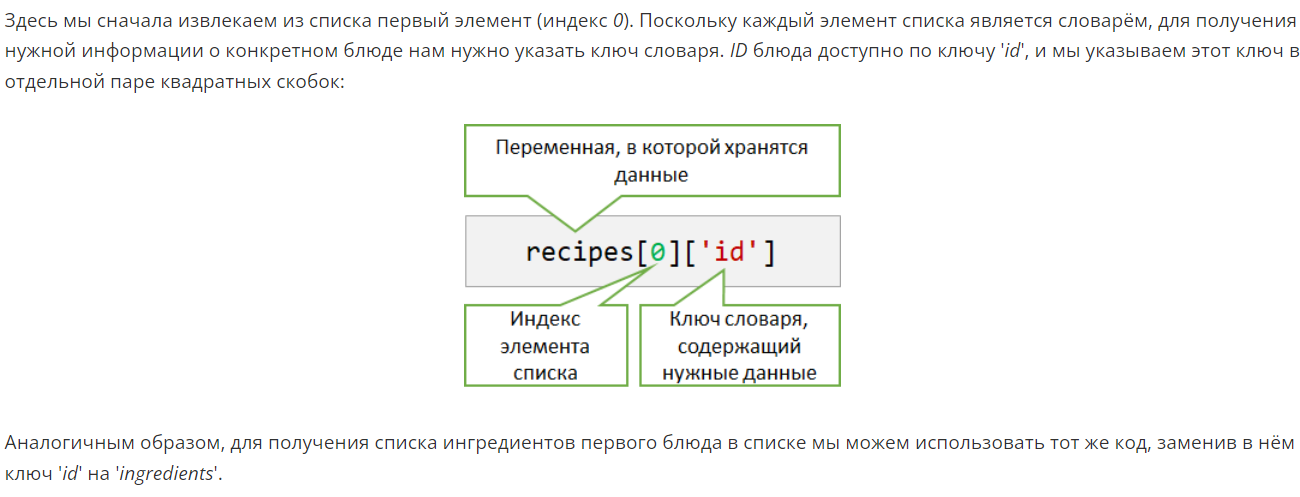

In [6]:
len(recipes[0]['ingredients'])

9

## ИЗ JSON В PANDAS

Как вы помните, после десериализации наши данные были преобразованы в список, элементами которого являются вложенные словари, содержащие по три пары "ключ-значение". 

Поскольку структура всех вложенных словарей одинакова, мы можем создать DataFrame на основе списка, не проводя с ним никаких дополнительных манипуляций:

In [7]:
# Импортируем модуль json
import json 
# Импортируем функцию pprint()
from pprint import pprint 
# Импортируем модуль pandas
import pandas as pd 
# Открываем файл и связываем его с объектом "f"
with open('data/recipes.json') as f: 
    # Загружаем содержимое открытого файла в переменную recipes
    recipes = json.load(f) 
# Создаём объект DataFrame из списка recipes
df = pd.DataFrame(recipes) 
# Выводим на экран первые строки полученного DataFrame
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
495,1121,chinese,"[ground pepper, garlic, safflower oil, green o..."
496,18376,italian,"[penne, garlic, eggplant, lemon juice, olive o..."
497,17815,italian,"[cold water, dry white wine, fish fillets, cho..."
498,32878,southern_us,"[water, cajun seasoning, yellow onion, shrimp,..."


Каждая строка соответствует одному рецепту, в столбце id хранится его идентификационный номер, в столбце cuisine — тип кухни, а столбец ingredients содержит список, в котором перечислены ингредиенты, необходимые для приготовления блюда.

Такая структура не очень практична, поскольку она не позволяет осуществлять группировку данных и выполнять многие другие операции, связанные с исследованием ингредиентов разных блюд. Например, представьте, что вы хотите отфильтровать блюда, состоящие не более чем из пяти ингредиентов, или блюда, не содержащие мяса. Сделать это, когда ингредиенты блюд хранятся в списках, не очень просто.

Для полноценной работы с данными нам необходимо иметь возможность хранить информацию о каждом ингредиенте в отдельном столбце, например:

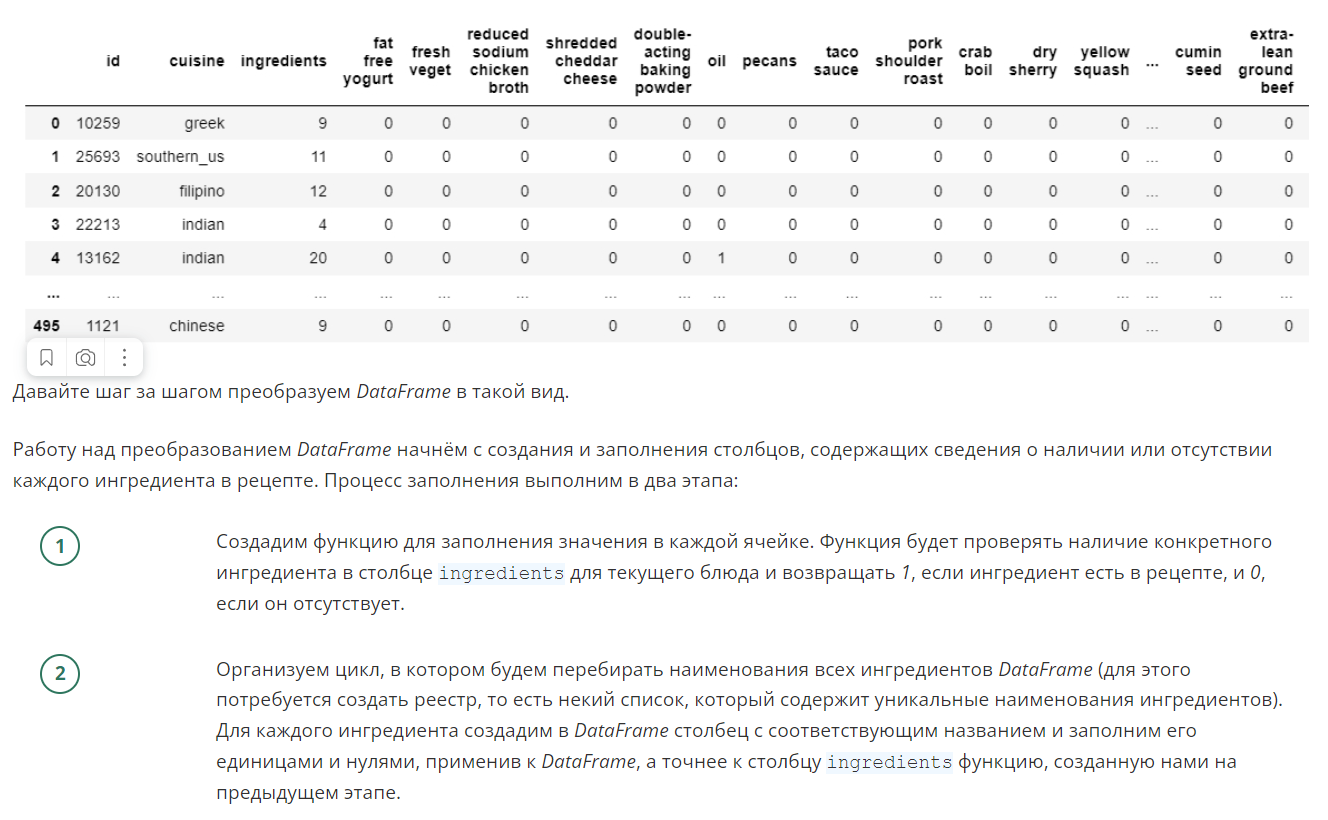

In [8]:
all_ingredients=set() # Создаем пустое множество для хранения реестра уникальных ингредиентов
for recipe in recipes: # Начинаем перебор всех блюд входящих в список
    for ingredient in recipe['ingredients']: # Начинаем перебор всех ингредиентов, входящих в состав текущего блюда
        all_ingredients.add(ingredient ) # Добавляем уникальный ингредиент в реестр
display(len(all_ingredients)) # Выводим на экран количесвто уникальных ингредиентов из реестра

1318

Теперь определим функцию contains(), с помощью которой мы будем проверять наличие конкретного ингредиента ingredient_name в рецепте текущего блюда, который представлен списком ingredient_list (значение в ячейке столбца ingredients текущего рецепта).

 Функция будет возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует:

In [9]:
# Определяем имя функции и передаваемые аргументы    
def contains(ingredient_list): 
    # Если ингредиент есть в текущем блюде,
    if ingredient_name in ingredient_list:   
        # возвращаем значение 1
        return 1 
    # Если ингредиента нет в текущем блюде,
    else: 
        # возвращаем значение 0
        return 0
    
# Последовательно перебираем ингредиенты в реестре all_ingredients
for ingredient_name in all_ingredients: 
    # В DataFrame cоздаем столбец с именем текущего ингредиента 
    # и заполняем его единицами и нулями,
    # используя ранее созданную функцию contains
    df[ingredient_name] = df['ingredients'].apply(contains)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10828\3628868966.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10828\3628868966.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10828\3628868966.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

Отлично! Осталось лишь перебрать все ингредиенты из ранее созданного реестра all_ingredients с помощью цикла  for  и создать в DataFrame столбец с соответствующим названием, заполнив его единицами и нулями. Для этого применим к DataFrame, а точнее, к столбцу ingredients функцию contains().

В завершение изменим значение столбца ingredients — вместо списка ингредиентов в каждом рецепте заполним столбец данными о количестве ингредиентов в нём:

In [10]:
# Заменяем список ингредиентов в рецепте на их количество 
df['ingredients'] = df['ingredients'].apply(contains) 
# Выводим содержимое полученного DataFrame на экран

In [11]:
df

,id,cuisine,ingredients,firm tofu,corn syrup,jasmine rice,wonton wrappers,organic sugar,ham,tamarind,...,jumbo shrimp,ground lamb,green beans,pistachio nuts,swiss chard,ground pork,spring onions,pepitas,red potato,frozen edamame beans
0,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1121,chinese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,18376,italian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,17815,italian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,32878,southern_us,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.to_csv('data/recipes.csv', index = False)